# The Standard Normal Distribution - Lab

## Introduction

In the previous lesson, you learned about the formula of the $z$-score, and looked at a few toy examples to explain an observation's standard score for normally distributed data. In this lab, you'll practice by standardizing and visualize some normal distributions.

## Objectives

You will be able to:

* Calculate and interpret the z-score (standard score) for an observation from normally distributed data
* Visualize data before and after standardization to visually inspect the results

## Let's get started

> A $z$-score can help identify how many standard deviations above or below the mean a certain observation is. Every time you obtain a $z$-score, use “above” or “below” in your phrasing.

The yields of apple trees in an orchard have been recorded in the file `yield.csv`. Each observation is recorded by weighing apples from trees (in pounds) and adding their weights. There are 5000 observations in total for this data. 

## Load, visualize and give general comments about the dataset

Use pandas for loading and inspecting the data.

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import numpy as np
%matplotlib inline

# Read the yield data as a dataframe
df1 = pd.read_csv('yield.csv')
df1.columns=['Weight']
print(df1.describe())

            Weight
count  5000.000000
mean     42.407624
std       6.003697
min      21.931212
25%      38.371895
50%      42.352304
75%      46.458478
max      65.548170


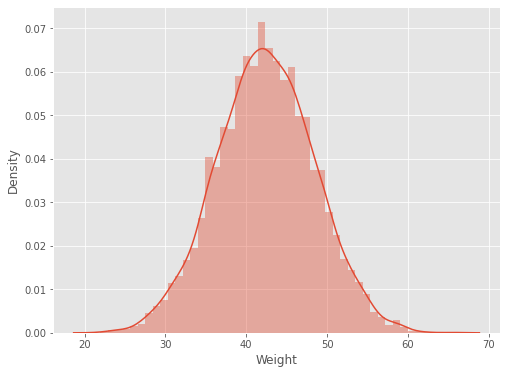

In [2]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')

g = sns.distplot(df1['Weight'], bins='auto')
plt.xlabel('Weight');

In [3]:
# Your comments about the data here

# The data seems to be normally distributed as can be seen above

## Briefly explain what each value represents in this data set

In [4]:
# Your answer here

# Each value is the total weight of all apples gathered from a single tree

## Define the interval bounds which contain 99% of the observations   

> **Hint**: Recall the empirical rule related to $3\sigma$.

In [5]:
# Perform any calculations necessary here
stats = list(df1.describe()['Weight'].keys())
df1_stats = {}
for stat in stats:
    df1_stats[stat] = df1.describe()['Weight'][stat]
df1_stats

{'count': 5000.0,
 'mean': 42.40762385776269,
 'std': 6.003696504846302,
 'min': 21.93121221285836,
 '25%': 38.37189495161705,
 '50%': 42.352303613800444,
 '75%': 46.458478204159746,
 'max': 65.54817042071103}

In [6]:
sd = float(df1_stats['std'])
three_z = 3 * sd

mean = float(df1_stats['mean'])

upper = mean + three_z
lower = mean - three_z
three_z_range = upper - lower
print(f'Standard deviation: {sd}\nMean: {mean}\n99% bounds: {lower, upper}\n99% range: {three_z_range}')

Standard deviation: 6.003696504846302
Mean: 42.40762385776269
99% bounds: (24.39653434322378, 60.418713372301596)
99% range: 36.02217902907782


## Compute and interpret the z-score for a tree yielding 35 pounds of apples

In [7]:
def z_score(x):
    return (x - mean) / sd

# Calculate z

z_score(35)

-1.2338438246808623

In [8]:
# Interpret the result

# A tree yielding 35 lbs of apples is a little over 1 std_dev below the mean
# Thus it's somewhat outside of the central 68% of results

## Suppose a tree has a z-score of 1.85. Interpret this z-score. What is the yield of this tree?

In [9]:
# Interpret the z score
# This means it's almost 2 std_dev's above the mean, so nearly in the top 5% of yields

In [10]:
def z_revert(z):
    return mean + z*sd

# Calculate yield
z_revert(1.85)

53.514462391728344

In [11]:
# What is the yield ?

# A tree with a z-score of 1.85 yields ~53 1/2 pounds of apples

##  Convert each tree’s yield to a z-score so the new variable is the “z-score for weight”

The units are still the apple trees. For the data set of all z-scores:

* What is the shape? 
* The mean? 
* The standard deviation?

Mean: 0.00000000000000044622
Rounded Mean: 0.0
SD: 1.0


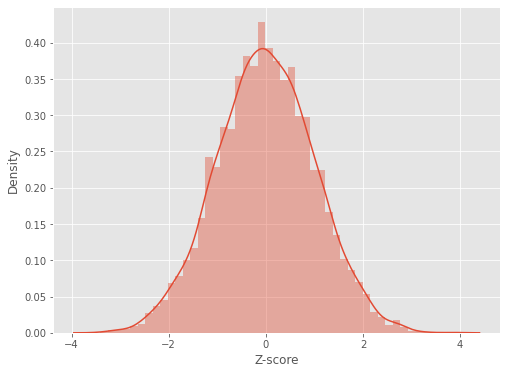

In [27]:
# Give your solution here 
z_data = [z_score(x) for x in df1['Weight']]

plt.figure(figsize=(8,6))
sns.distplot(z_data)
plt.xlabel('Z-score')


z_mean = np.mean(np.array(z_data))
z_sd = np.std((np.array(z_data)))
print ('Mean:', '{0:.20f}'.format(z_mean))
print ('Rounded Mean:', round(z_mean,1))
print ('SD:', round(z_sd, 1));

In [30]:
# Your observations

# Here is the standard normal distribution, with histogram bars as well as the kde line
# It has the same 'shape' as the distribution above - the only differences are:

# The mean is 0.0 (well, almost, since it's a random distribution it ends up not exactly 0)
# The std_dev is 1.0 as well (same caveat as the mean)
# This makes sense, as it's a standardized dataset

## Summary

In this lab, you practiced your knowledge of the standard normal distribution!